In [9]:
import pandas as pd
import sys

import seaborn as sns
sns_palette = sns.color_palette("colorblind")
from matplotlib.colors import LinearSegmentedColormap

custom_cmap = LinearSegmentedColormap.from_list("custom_rocket", sns_palette)


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')

sys.path.append('..')

[nltk_data] Downloading package stopwords to /home/malves/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/malves/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
# load organism_based data
organism_based = pd.read_csv("../data/chemblapi/organism_based.csv")

In [11]:
# remove NAs from canonical_smiles and standard_value
print(f'Before removing NAs: {len(organism_based)}')
organism_based = organism_based[~organism_based['canonical_smiles'].isna()]
print(f'After removing NAs Canonical Smiles: {len(organism_based)}')
organism_based = organism_based[~organism_based['standard_value'].isna()]
print(f'After removing NAs Standard Value: {len(organism_based)}')

Before removing NAs: 45516
After removing NAs Canonical Smiles: 45457
After removing NAs Standard Value: 43865


In [12]:
# check unique values in standard_relation
print(
    f'Unique values in standard_relation: {organism_based["standard_relation"].unique()}')

Unique values in standard_relation: ['=' '>' '<' '<=' nan '>=']


In [13]:
# keep only the rows with standard_relation as '='
organism_based = organism_based[organism_based['standard_relation'] == '=']
print(f'After keeping only standard_relation as "=": {len(organism_based)}')

After keeping only standard_relation as "=": 35042


In [14]:
# check unique values in standard_units and respective frequencies
print(
    f'Frequencies of standard_units: {organism_based["standard_units"].value_counts()}')

Frequencies of standard_units: standard_units
nM                  17827
ug.mL-1             17212
mg                      1
10^-3micromol/ml        1
umol/cm3                1
Name: count, dtype: int64


In [15]:
descriptions = organism_based['assay_description'].unique()
len(descriptions)

3724

In [17]:
organism_based['assay_description'].nunique()

3724

In [ ]:
# # save the descriptions to a csv file
# organism_based_unique_descriptions = organism_based.assay_description.unique()
# df = pd.DataFrame(organism_based_unique_descriptions, columns=['assay_description'])
# df.to_csv('../data/llama/unique_assay_descriptions.csv', index=False)

# #save the organism_based data to a csv file
# organism_based.to_csv("../data/chemblapi/organism_based_cleaned.csv", index=False)

Number of descriptions containing "resistant": 1156
Number of descriptions containing "resistance": 13


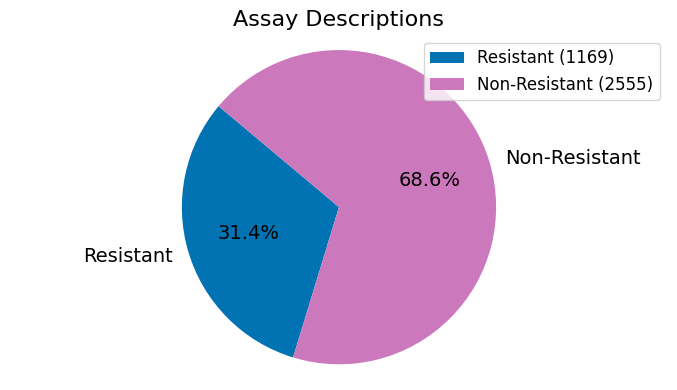

In [ ]:
# check if resistant or resistance is present in any of the descriptions
resistant_count = sum('resistant' in desc.lower() for desc in descriptions)
resistance_count = sum('resistance' in desc.lower() for desc in descriptions)
print(f'Number of descriptions containing "resistant": {resistant_count}')
print(f'Number of descriptions containing "resistance": {resistance_count}')

# pie chart of resistant+resistance vs non-resistant
labels = ['Resistant', 'Non-Resistant']
sizes = [resistant_count + resistance_count,
         len(descriptions) - (resistant_count + resistance_count)]
colors = [sns_palette[0], sns_palette[4]]
plt.figure(figsize=(7, 4))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Assay Descriptions', fontsize=16)
plt.legend([f'Resistant ({resistant_count + resistance_count})',
               f'Non-Resistant ({len(descriptions) - (resistant_count + resistance_count)})'],
           loc='upper right', fontsize=12)
plt.tight_layout()
plt.savefig('../figures/resistant_vs_non_resistant_descriptions.png', dpi=300)
plt.show()

In [10]:
# check number of rows with resistant or resistance
resistant_rows = organism_based[organism_based['assay_description'].str.contains(
    'resistant', case=False)]

resistance_rows = organism_based[organism_based['assay_description'].str.contains(
    'resistance', case=False)]
print(f'Number of rows containing "resistant": {len(resistant_rows)}')
print(f'Number of rows containing "resistance": {len(resistance_rows)}')

Number of rows containing "resistant": 6249
Number of rows containing "resistance": 97


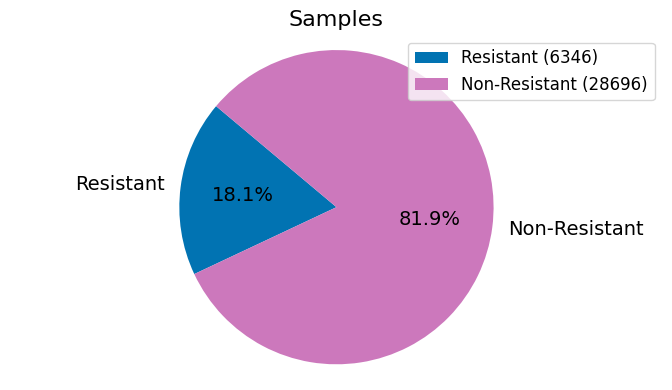

In [ ]:
# pie chart of percentage (and real number) of resistant (resistant+resistance) and non-resistant


resistant_count = len(resistant_rows) + len(resistance_rows)

non_resistant_count = len(organism_based) - resistant_count
labels = ['Resistant', 'Non-Resistant']
sizes = [resistant_count, non_resistant_count]
colors = [sns_palette[0], sns_palette[4]]
plt.figure(figsize=(7, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=140, textprops={'fontsize': 14})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(f'Samples', fontsize=16)
# add legend
plt.legend([f'Resistant ({resistant_count})',
           f'Non-Resistant ({non_resistant_count})'], loc='upper right', fontsize=12)
plt.tight_layout()
plt.savefig('../figures/resistant_vs_non_resistant_samples.png', dpi=300)
plt.show()

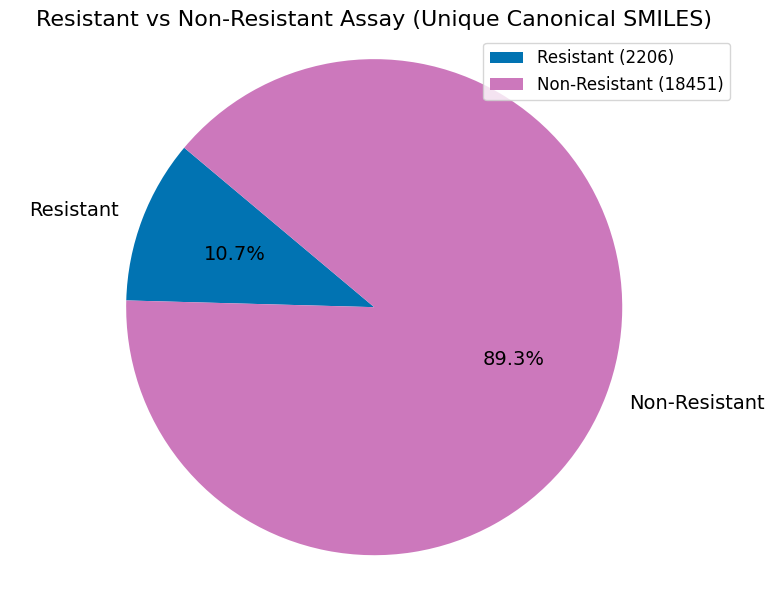

In [ ]:
# pie chart of percentage (and real number) of resistant (resistant+resistance) and non-resistant removing duplicates
resistant_rows_unique = resistant_rows.drop_duplicates(
    subset=['canonical_smiles'])
resistance_rows_unique = resistance_rows.drop_duplicates(
    subset=['canonical_smiles'])
resistant_count_unique = len(resistant_rows_unique) + \
    len(resistance_rows_unique)

# get non-resistant rows (rows not containing resistant or resistance in assay_description)
non_resistance_rows = organism_based[~organism_based['assay_description'].str.contains(
    'resistance', case=False)]
non_resistance_rows = non_resistance_rows[~non_resistance_rows['assay_description'].str.contains(
    'resistant', case=False)]
non_resistant_count_unique = len(
    non_resistance_rows.drop_duplicates(subset=['canonical_smiles']))

# pie chart of percentage (and real number) of resistant (resistant+resistance) and non-resistant removing duplicates
labels = ['Resistant', 'Non-Resistant']
sizes = [resistant_count_unique, non_resistant_count_unique]
colors = [sns_palette[0], sns_palette[4]]
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=140, textprops={'fontsize': 14})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(f'Resistant vs Non-Resistant Assay (Unique Canonical SMILES)', fontsize=16)
# add legend
plt.legend([f'Resistant ({resistant_count_unique})',
           f'Non-Resistant ({non_resistant_count_unique})'], loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()

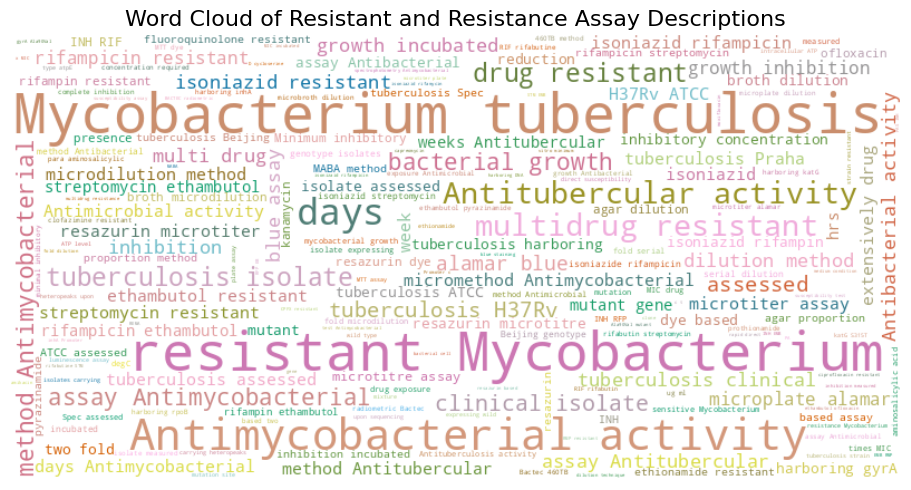

In [17]:
#wordcloud of assay descriptions

def generate_wordcloud(text, title):
    # Generate a word cloud image
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=custom_cmap).generate(text)

    # Display the generated image:
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()
    
# Combine resistant and resistance descriptions into a single description
resistant_descriptions = resistant_rows['assay_description'].unique().tolist()
resistance_descriptions = resistance_rows['assay_description'].unique().tolist()
combined_descriptions = resistant_descriptions + resistance_descriptions
# Join the descriptions into a single string
combined_text = ' '.join(combined_descriptions)
# Generate the word cloud
generate_wordcloud(combined_text, 'Word Cloud of Resistant and Resistance Assay Descriptions')

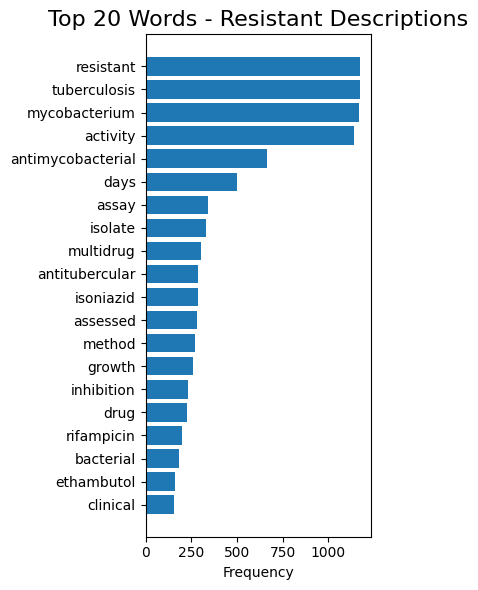

In [25]:
from collections import Counter
import matplotlib.pyplot as plt
import re

# Tokenize the combined text (basic word split, can improve with NLP tools)
stop_words = set(stopwords.words('english'))    
# Tokenize and clean text
words = re.findall(r'\b\w+\b', combined_text.lower())  # Lowercase and extract words
filtered_words = [word for word in words if word not in stop_words and len(word) > 2]

# Count word frequencies
word_counts = Counter(filtered_words)
top_words = word_counts.most_common(20)

# Unpack and plot
labels, counts = zip(*top_words)
plt.figure(figsize=(4, 6))
plt.barh(labels[::-1], counts[::-1])  # Descending order
plt.xlabel("Frequency")
plt.title("Top 20 Words - Resistant Descriptions", fontsize=16)
plt.tight_layout()
plt.show()

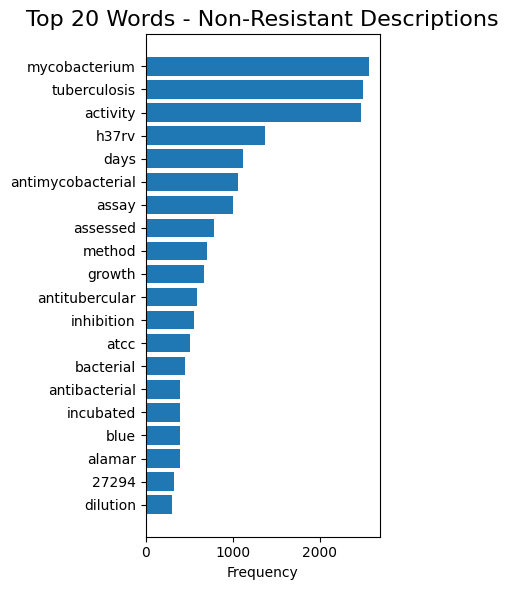

In [26]:
#top 20 words in non-resistant descriptions
non_resistant_descriptions = non_resistance_rows['assay_description'].unique().tolist()
# Join the descriptions into a single string
non_resistant_combined_text = ' '.join(non_resistant_descriptions)
# Tokenize and clean text
non_resistant_words = re.findall(r'\b\w+\b', non_resistant_combined_text.lower())  # Lowercase and extract words
filtered_non_resistant_words = [word for word in non_resistant_words if word not in stop_words and len(word) > 2]
# Count word frequencies
non_resistant_word_counts = Counter(filtered_non_resistant_words)
top_non_resistant_words = non_resistant_word_counts.most_common(20)
# Unpack and plot
non_resistant_labels, non_resistant_counts = zip(*top_non_resistant_words)
plt.figure(figsize=(4, 6))
plt.barh(non_resistant_labels[::-1], non_resistant_counts[::-1])  # Descending order
plt.xlabel("Frequency")
plt.title("Top 20 Words - Non-Resistant Descriptions", fontsize=16)
plt.tight_layout()
plt.show()
